In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings # Got an irritating warning

warnings.filterwarnings('ignore')
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# In this file i will be taking a look the "Hovedart FAO" feature in greater detail.

In [ ]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

I want to see the distribution of species in this feature, are there any species that appear more often than others? 

In [ ]:
count_for_every_species = dataset.groupby(["Hovedart FAO"])["Hovedart FAO"].count()
count_for_every_species.sort_values(ascending=True, inplace=True)
print(count_for_every_species)

There are a lot of species here that have very little entries, i assume anything below 5 entries will be really hard for the machine learning model to predict due to lack of data to compare with. If it has 5 or less entries it will be impossible to predict because there wont be enough data for the machine learning to learn from. Considering that "Hovedart FAO" will be the feature we use to identify if it is a Bycatch the only thing we have to consider when thinking about outliers is if there are enough entries of each species in Hovedart such that our ml model can actually find a pattern. 

# Finding out if species with under 30 entries have enough data to be useful

## Method: I will go through each of the low entry species and see if there is any way a machinelearning model can find a pattern from these species.

The species i will be looking at are Rognkjeks (felles), Lanternfishes nei *, Skrubbe, Hakes nei. *, Laksesild, Gapeflyndre, Glassvar, Annen torskefisk.
Since we will be predicting "Art FAO" i have to see if there is enough data.

In [ ]:
species_with_few_entries = ["Rognkjeks (felles)", "Lanternfishes nei *", "Skrubbe, Hakes nei. *", "Laksesild", "Gapeflyndre", "Glassvar","Annen torskefisk", "Havmus", "Akkar", "Kongekrabbe", "Skjellbrosme", "Lomre"]

species_with_few_entries_dataset = dataset[dataset["Hovedart FAO"].isin(species_with_few_entries)]

pd.DataFrame(species_with_few_entries_dataset[["Hovedart FAO", "Art FAO"]])

In [ ]:
grouped_counts = species_with_few_entries_dataset.groupby(["Hovedart FAO", "Art FAO"])["Art FAO"].count()
print(grouped_counts)

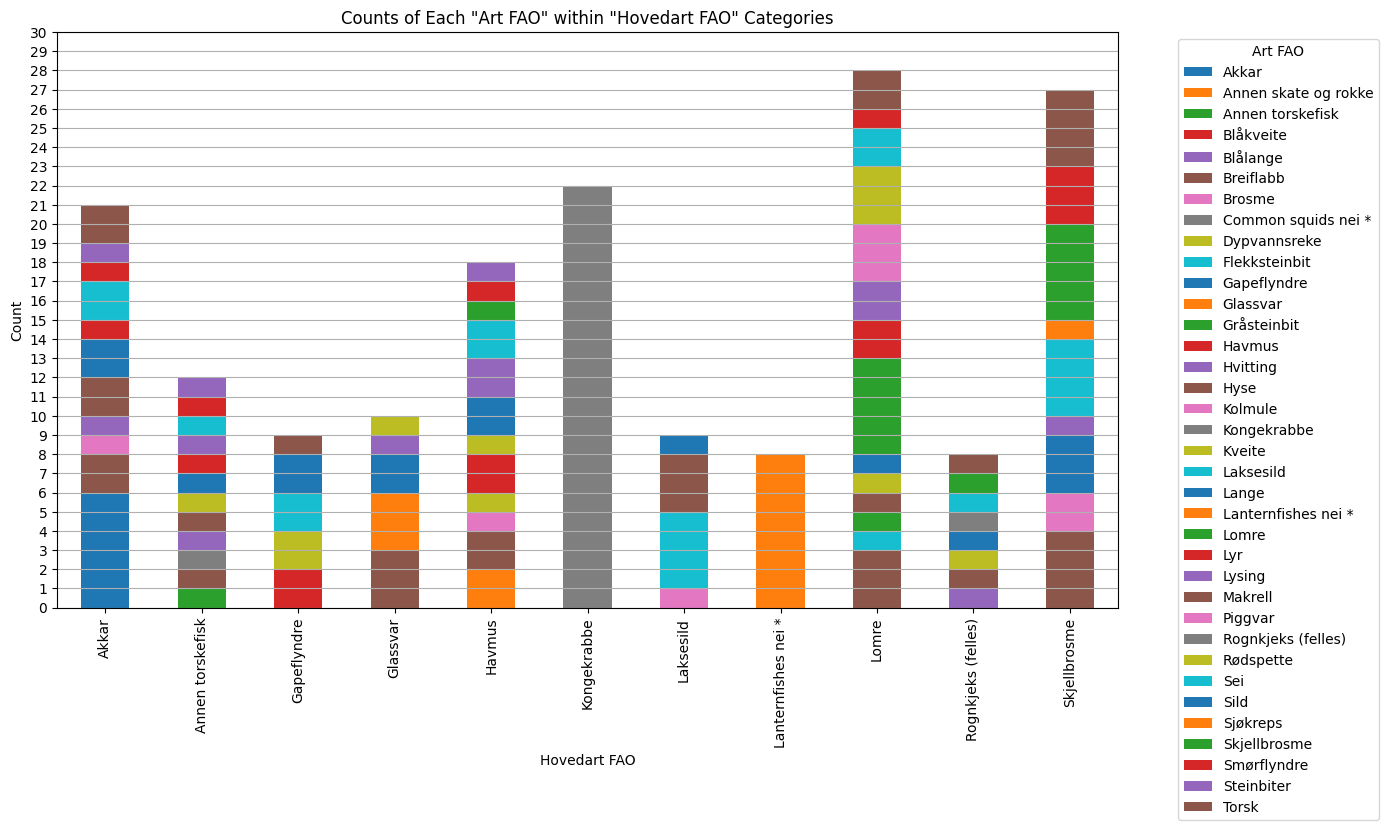

In [72]:
grouped_counts_df = grouped_counts.reset_index(name='Count')

pivot_df = grouped_counts_df.pivot(index='Hovedart FAO', columns='Art FAO', values='Count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Counts of Each "Art FAO" within "Hovedart FAO" Categories')
plt.xlabel('Hovedart FAO')
plt.ylabel('Count')
plt.yticks(range(0,31))
plt.legend(title='Art FAO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis="y")

plt.show()

From this graph i think its safe that out of all species with less than 30 species we will only include: Akkar, Laksesild, Lanternfishes, Skjellbrosme, Lomre.
I believe we should drop the rest. since they are too spread out in "Art FAO" category.

# Seeing if there are any NaN values in the "Hovedart FAO" feature

In [73]:
print(dataset["Hovedart FAO"].isna().sum())

4978


In [78]:
print(dataset["Art FAO"].isna().sum())

4982


In [82]:
# Checking the count for entries where both the Hovedart and Art are both missing
nan_count = dataset[dataset["Art FAO"].isna() & dataset["Hovedart FAO"].isna()].shape[0]

print(nan_count)

4978


In [85]:
# Checking out the entries where only artFAO is missing
only_art_FAO_is_NaN = dataset[(dataset["Art FAO"].isna()) & (~dataset["Hovedart FAO"].isna())]

pd.DataFrame(only_art_FAO_is_NaN)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
107844,1637751,29.04.2018 21:22,29.04.2018,21:22,29.04.2018 01:00,29.04.2018,01:00,"60,009","-3,18",42.000000,Shetland,50.000000,-118,29.04.2018 21:13,29.04.2018,21:13,1213,2018,"60,01","-3,18",42.000000,Shetland,50.000000,-118,111.000000,GEN,Gillnets and entangling nets (unspec)*,20.000000,Udefinert garn,COD,Torsk,1022.000000,MVB,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,28 m og over,469.000000,NaN,"8,5",34
120870,1648591,13.05.2018 19:53,13.05.2018,19:53,13.05.2018 01:00,13.05.2018,01:00,"60,1","-3,43",42.000000,Shetland,50.000000,-166,13.05.2018 19:42,13.05.2018,19:42,1122,2018,"60,101","-3,429",42.000000,Shetland,50.000000,-166,125.000000,GEN,Gillnets and entangling nets (unspec)*,20.000000,Udefinert garn,HKE,Lysing,1051.000000,FNO,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,28 m og over,469.000000,NaN,"8,5",34
284186,1783828,25.11.2018 15:43,25.11.2018,15:43,25.11.2018 07:20,25.11.2018,07:20,"62,484","5,636",7.000000,Storegga-Frøyabanken,33.000000,-95,25.11.2018 15:09,25.11.2018,15:09,469,2018,"62,357","5,435",7.000000,Storegga-Frøyabanken,33.000000,-77,17556.000000,LLS,Setteline,32.000000,Andre liner,HAD,Hyse,1027.000000,HSK,NaN,NaN,NaN,NaN,NaN,40.000000,3.000000,"15-20,99 m",NaN,146.000000,"6,4","20,99"
285174,1784762,26.11.2018 19:58,26.11.2018,19:58,26.11.2018 06:04,26.11.2018,06:04,"70,012","21,805",4.000000,Vest-Finnmark,4.000000,-282,26.11.2018 07:21,26.11.2018,07:21,77,2018,"70,013","21,803",4.000000,Vest-Finnmark,4.000000,-282,135.000000,PS1,"Snurpenot/ringnot, et fartøy",11.000000,Snurpenot/ringnot,HER,Sild,611.000000,LVU,NaN,NaN,NaN,NaN,NaN,70.000000,4.000000,"21-27,99 m",348.000000,NaN,"8,5","27,42"


Weird i didn't expect there to be any NaN values in this feature. 
<br>
Considering that this feature will be a vital part of our ml model i suggest we drop all NaN values in this feature, and also considering there are only 5000 entries which is missing the species it shouldnt impact our model that much. 
there also seems to be 4 entries where "Art FAO" is missing but not "Hovedart FAO", these entries doesn't seem that important. I suggest we drop these too. 